In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

DATA_PATH = "data"
DATA_FILE = "data.csv"

sns.set()

In [2]:
df = pd.read_csv(os.path.join(DATA_PATH, DATA_FILE))
df.head()

,estimator,policy_no,true_mean,point,ppf_025,ppf_975,estimated_std,true_std,hyperprior_loc,n_policies,beta,sim_no
0,Conventional,0,0.040700,2.010624,0.050660,3.970588,1.502697,0.089095,0.0,5,0,0
1,Conventional,1,0.085226,1.351345,-0.608619,3.311309,1.502697,0.089095,0.0,5,0,0
2,Conventional,2,-0.124489,-0.630365,-2.590329,1.329599,1.502697,0.089095,0.0,5,0,0
3,Conventional,3,0.073187,2.618388,0.658424,4.578352,1.502697,0.089095,0.0,5,0,0
4,Conventional,4,-0.046250,1.034562,-0.925402,2.994526,1.502697,0.089095,0.0,5,0,0


In [3]:
df["coverage"] = ((df.ppf_025 <= df.true_mean) & (df.true_mean <= df.ppf_975)).astype(int)
df["len_ci"] = df.ppf_975 - df.ppf_025
df["mae"] = abs(df.point - df.true_mean)
df["mse"] = (df.point - df.true_mean) ** 2
df["std_bias"] = df.estimated_std - df.true_std
df["abs_std_error"] = abs(df.std_bias)

In [4]:
def relplot(y, mask=None, **kwargs):
    plot_df = df if mask is None else df[mask]
    return sns.relplot(
        data=plot_df,
        x="hyperprior_loc",
        y=y,
        hue="estimator",
        col="n_policies",
        row="beta",
        kind="line",
        ci=False,
        **kwargs
    )

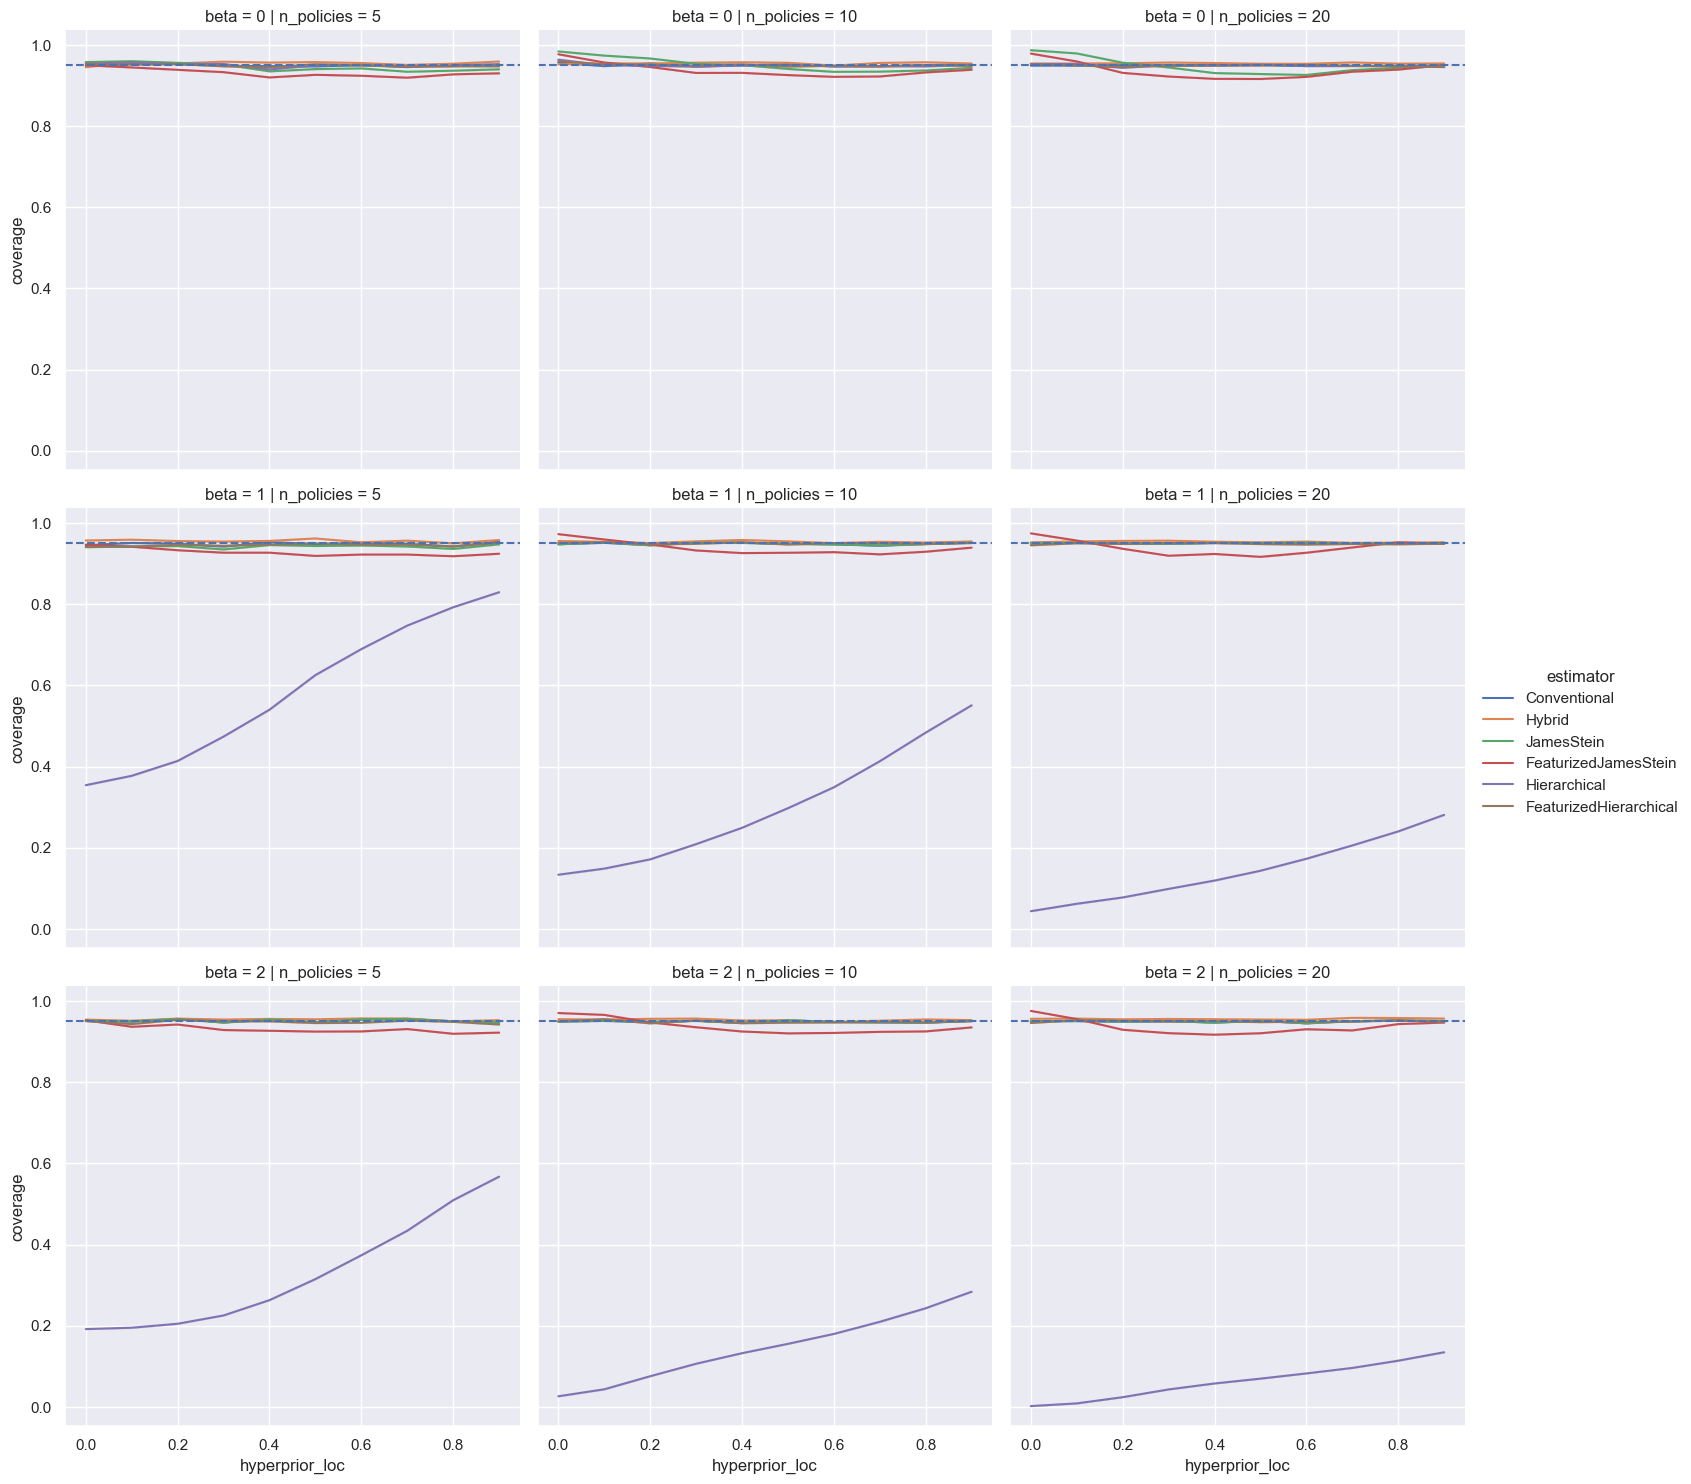

In [5]:
g = relplot("coverage")
for axes in g.axes:
    for ax in axes:
        ax.axhline(.95, linestyle="--")
plt.show()

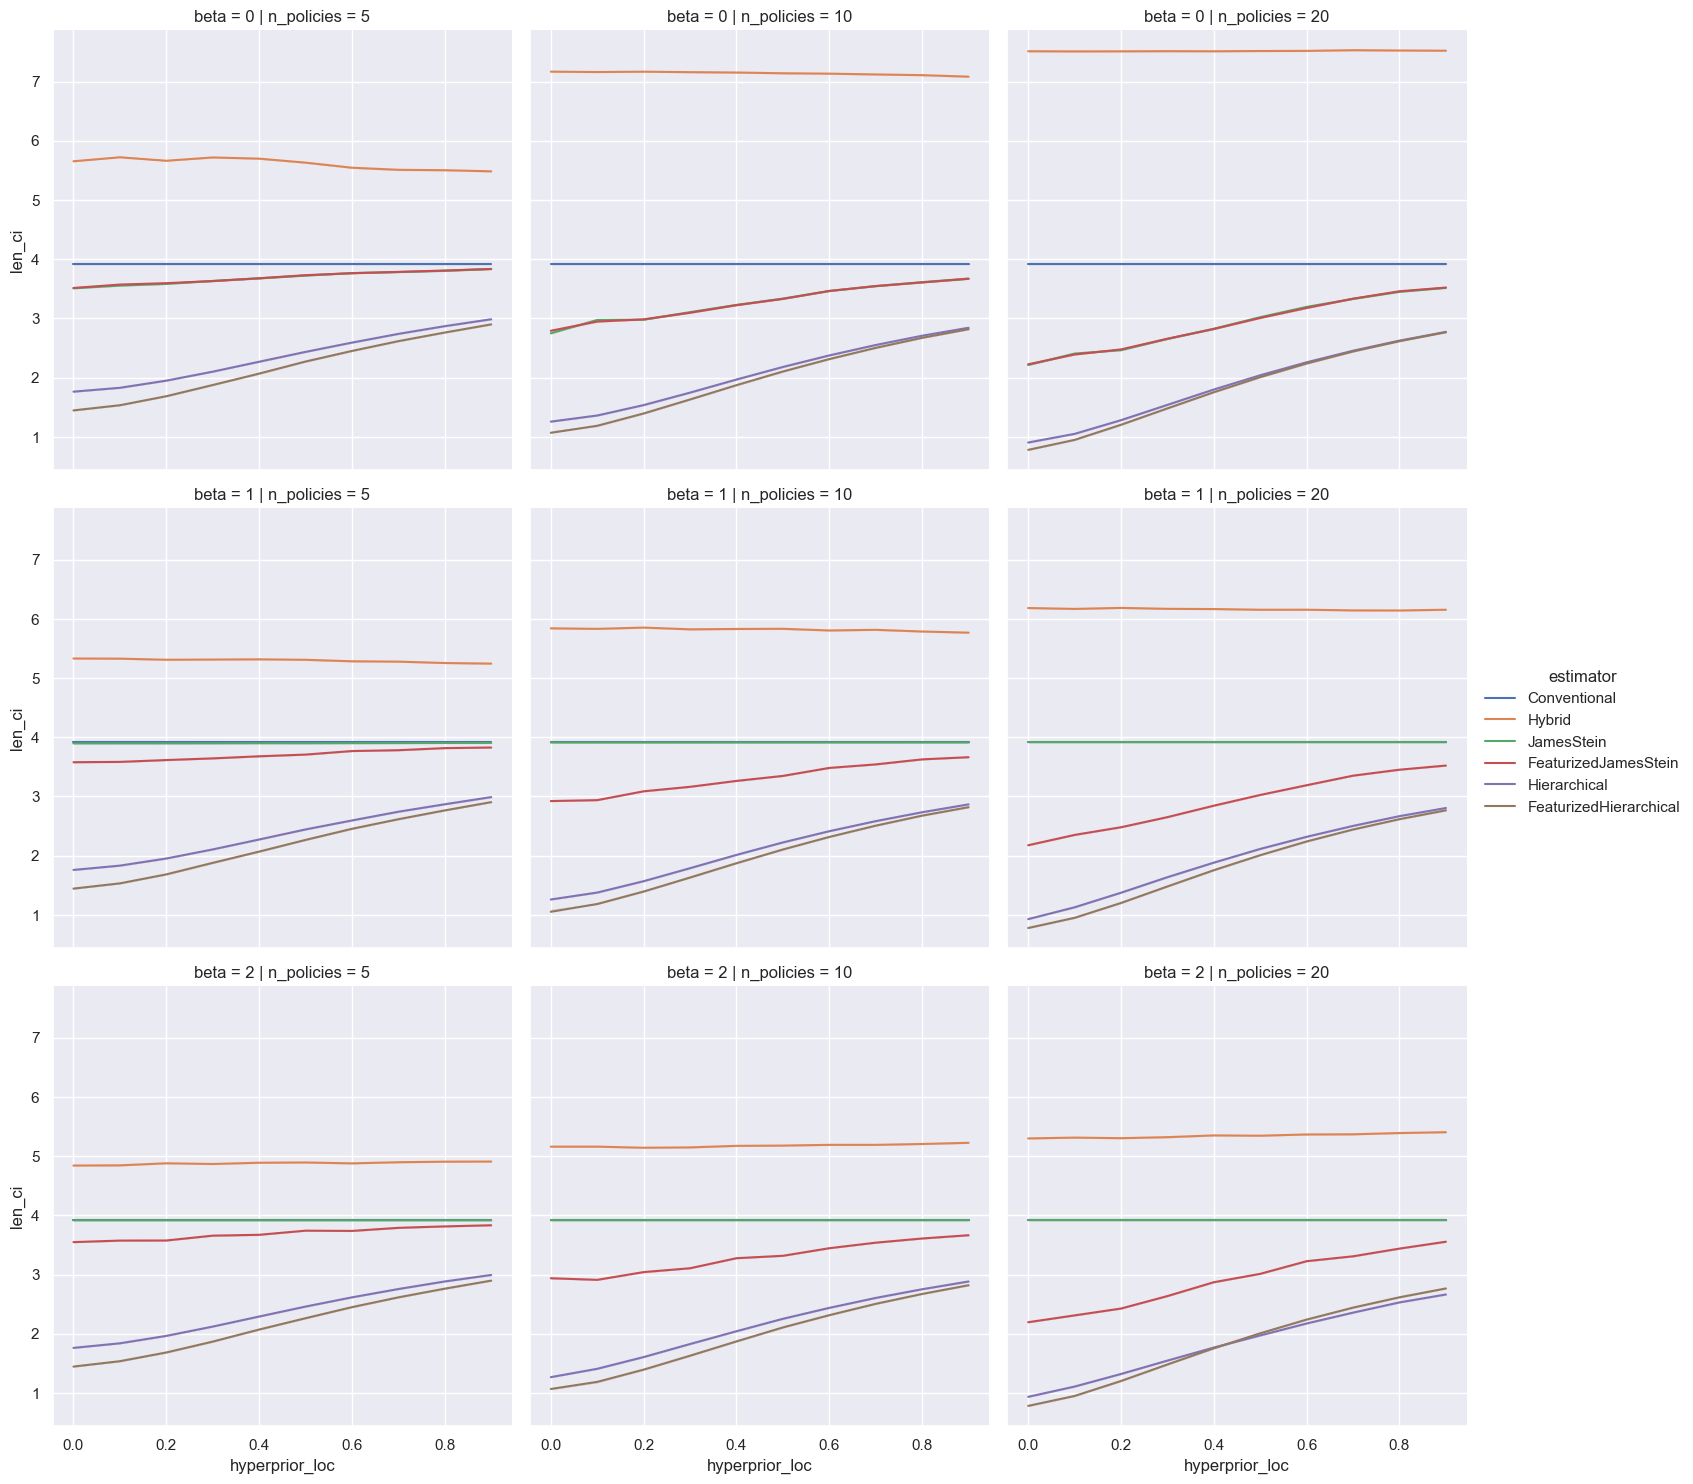

In [6]:
relplot("len_ci", estimator=lambda x: np.quantile(x, .5))
plt.show()

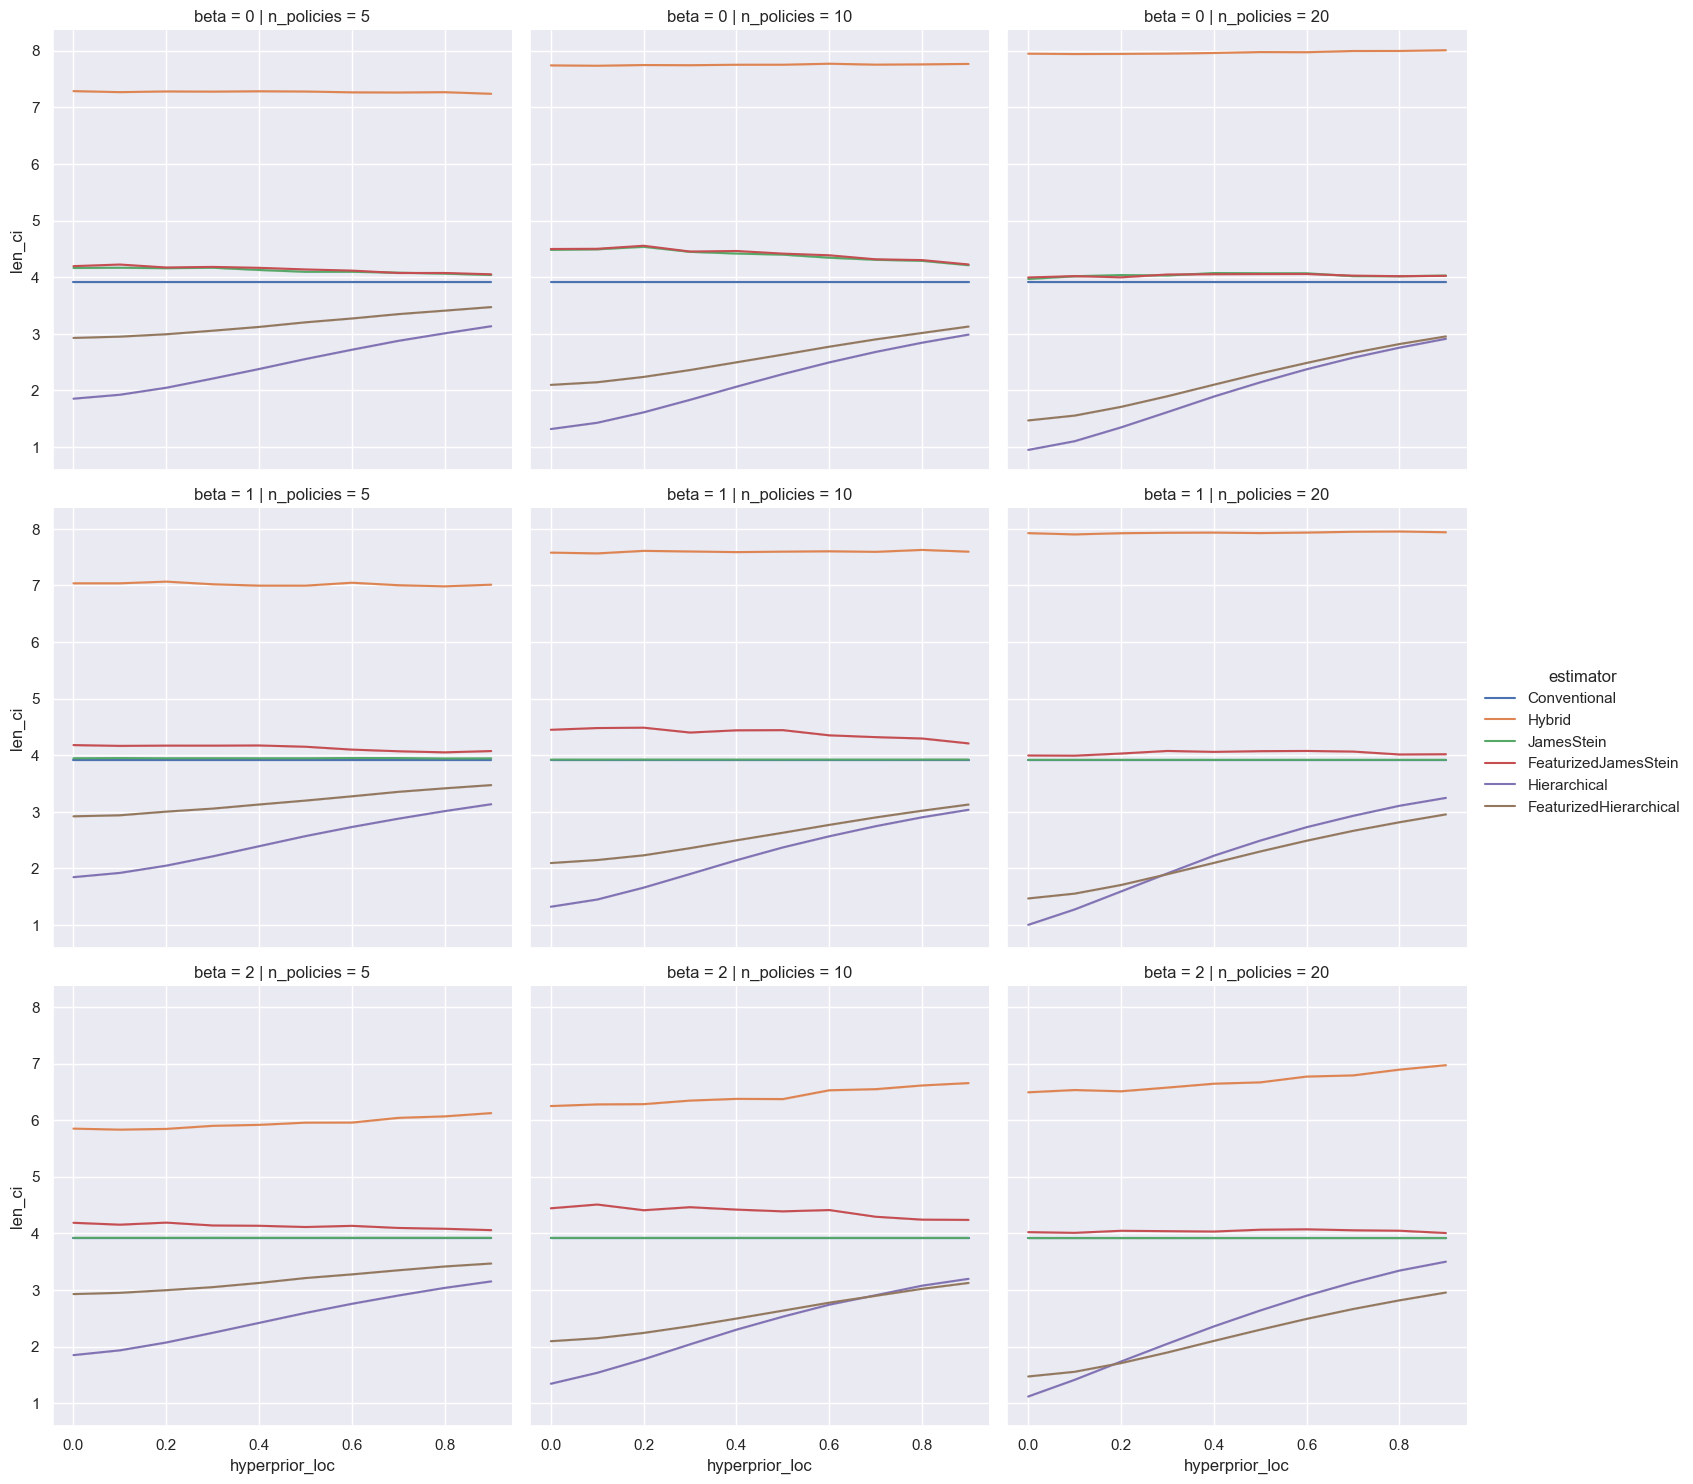

In [7]:
relplot("len_ci", estimator=lambda x: np.quantile(x, .95))
plt.show()

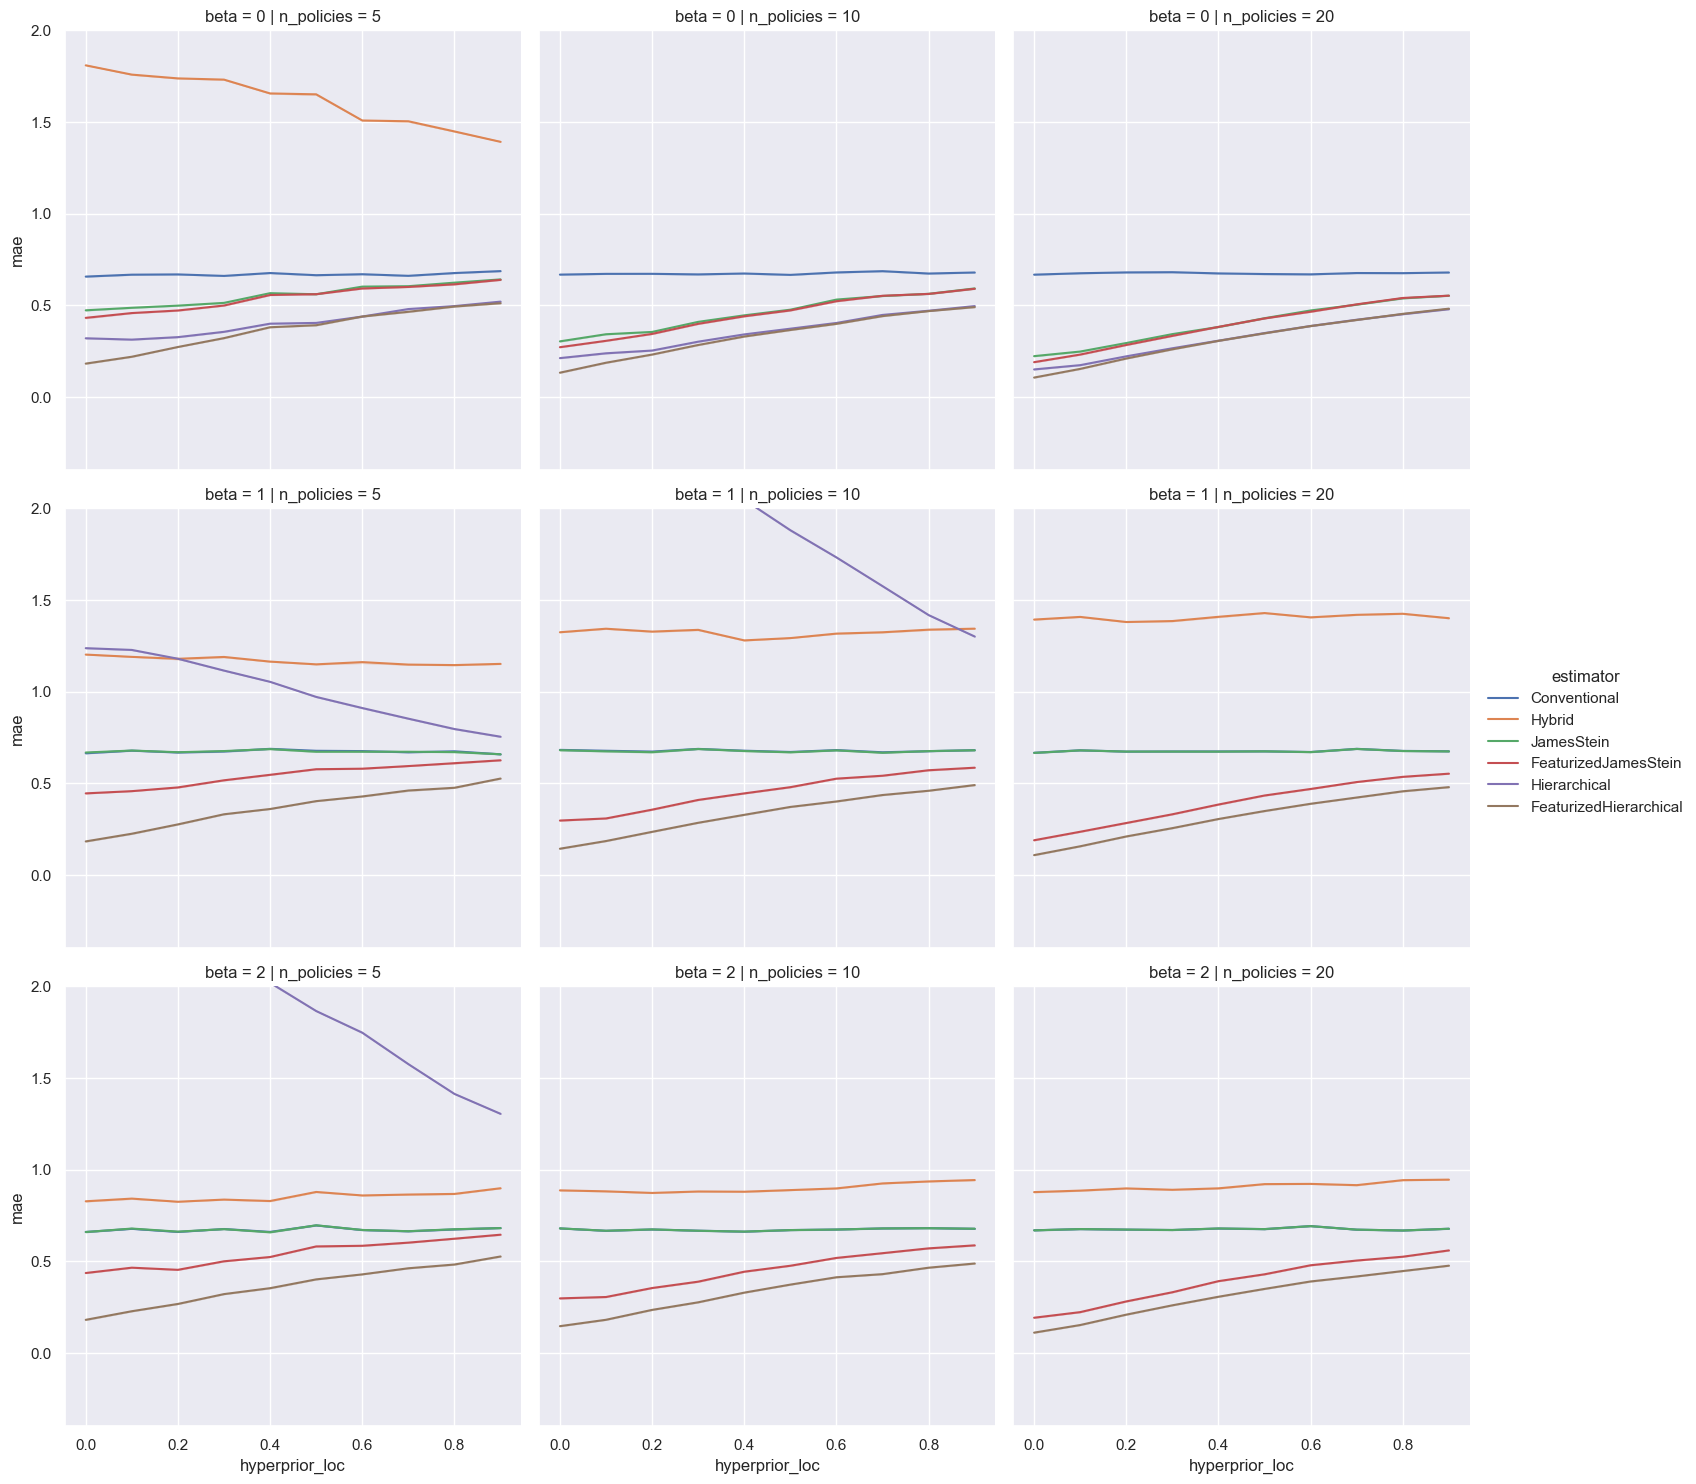

In [18]:
g = relplot("mae", estimator=lambda x: np.quantile(x, .5))
g.set(ylim=(None, 2))
plt.show()

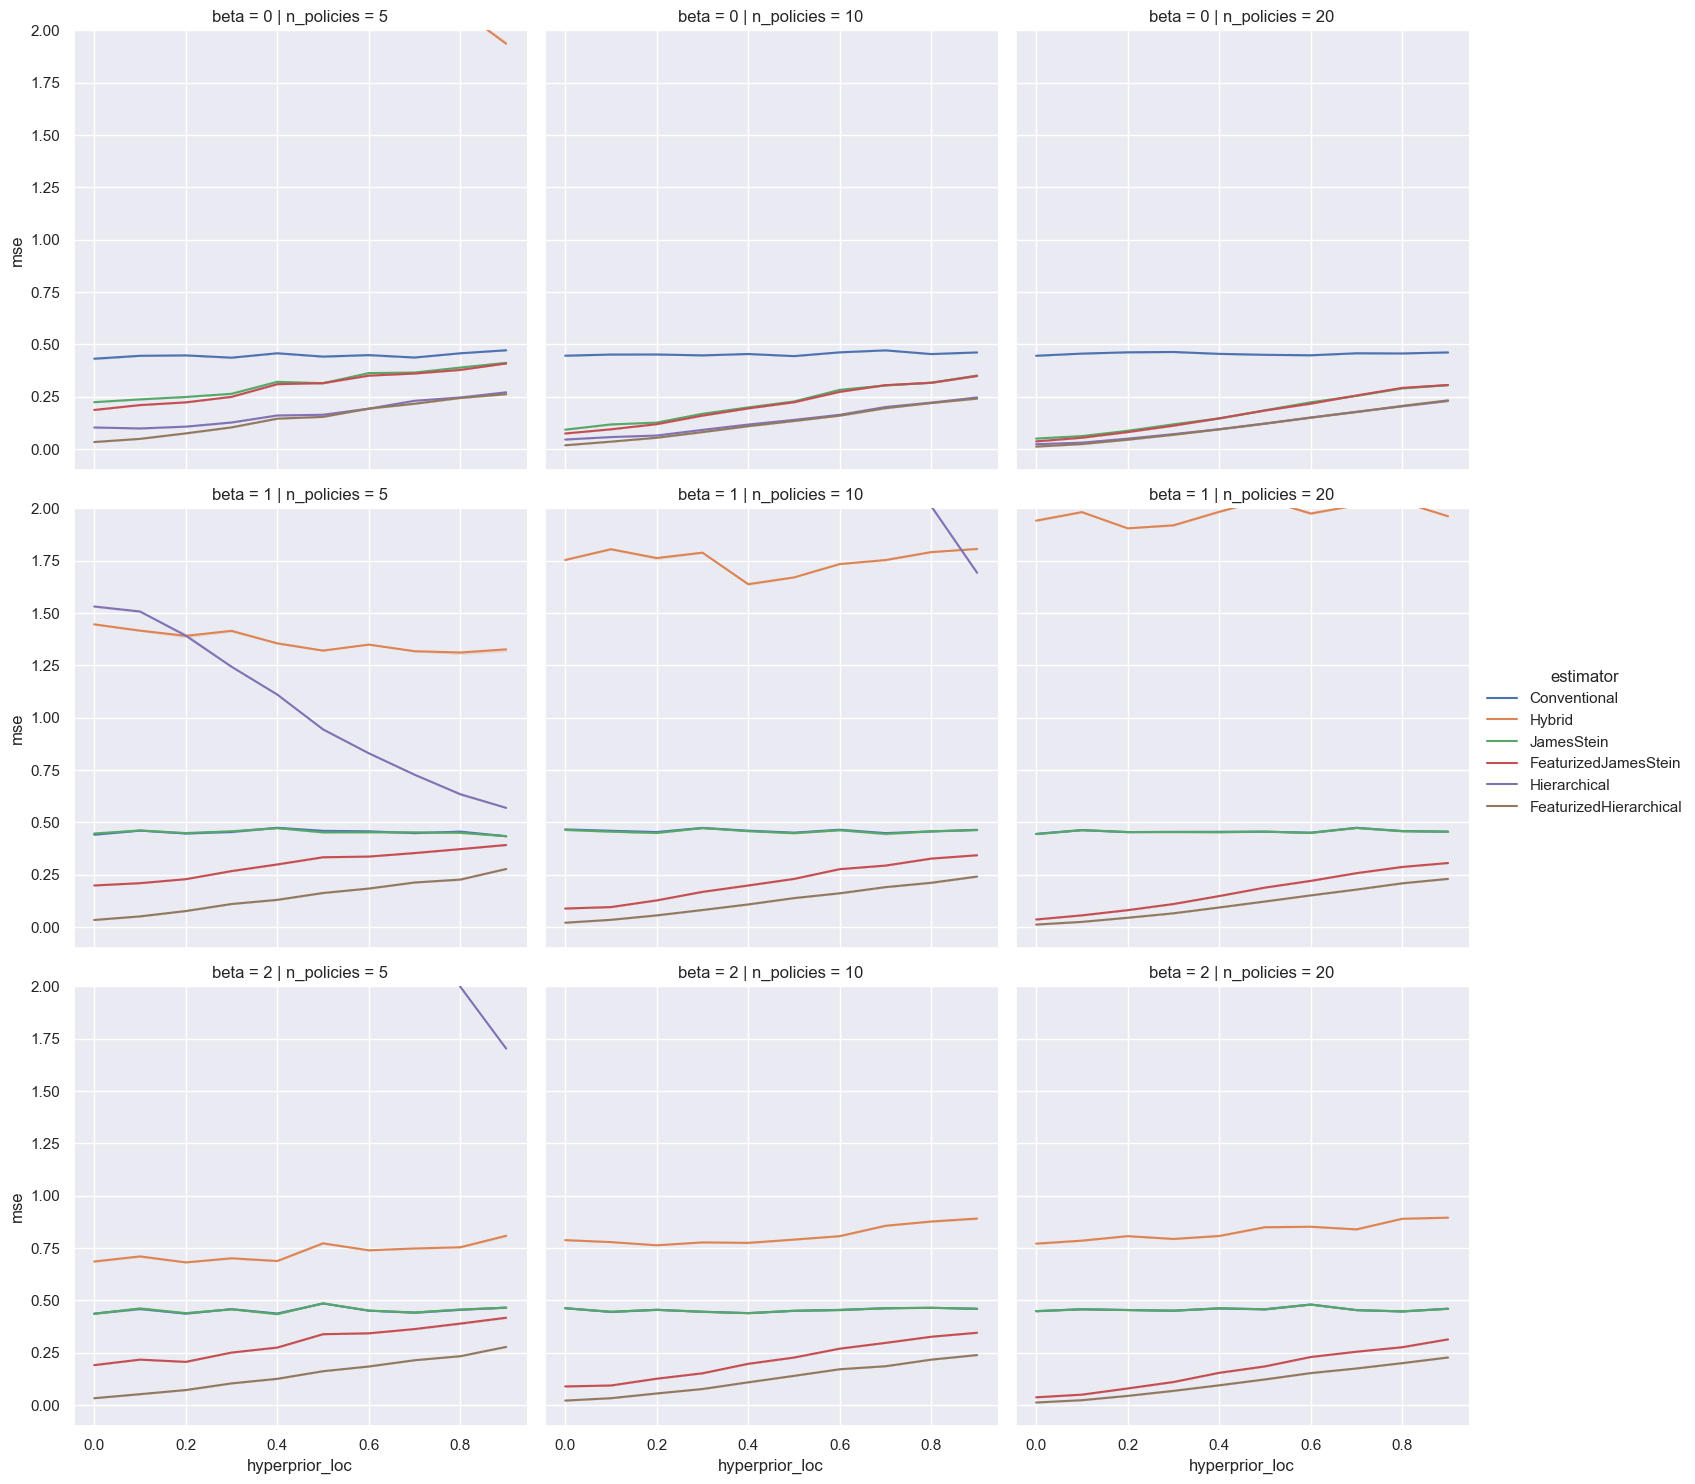

In [21]:
g = relplot("mse", estimator=lambda x: np.quantile(x, .5))
g.set(ylim=(-.1, 2))
plt.show()

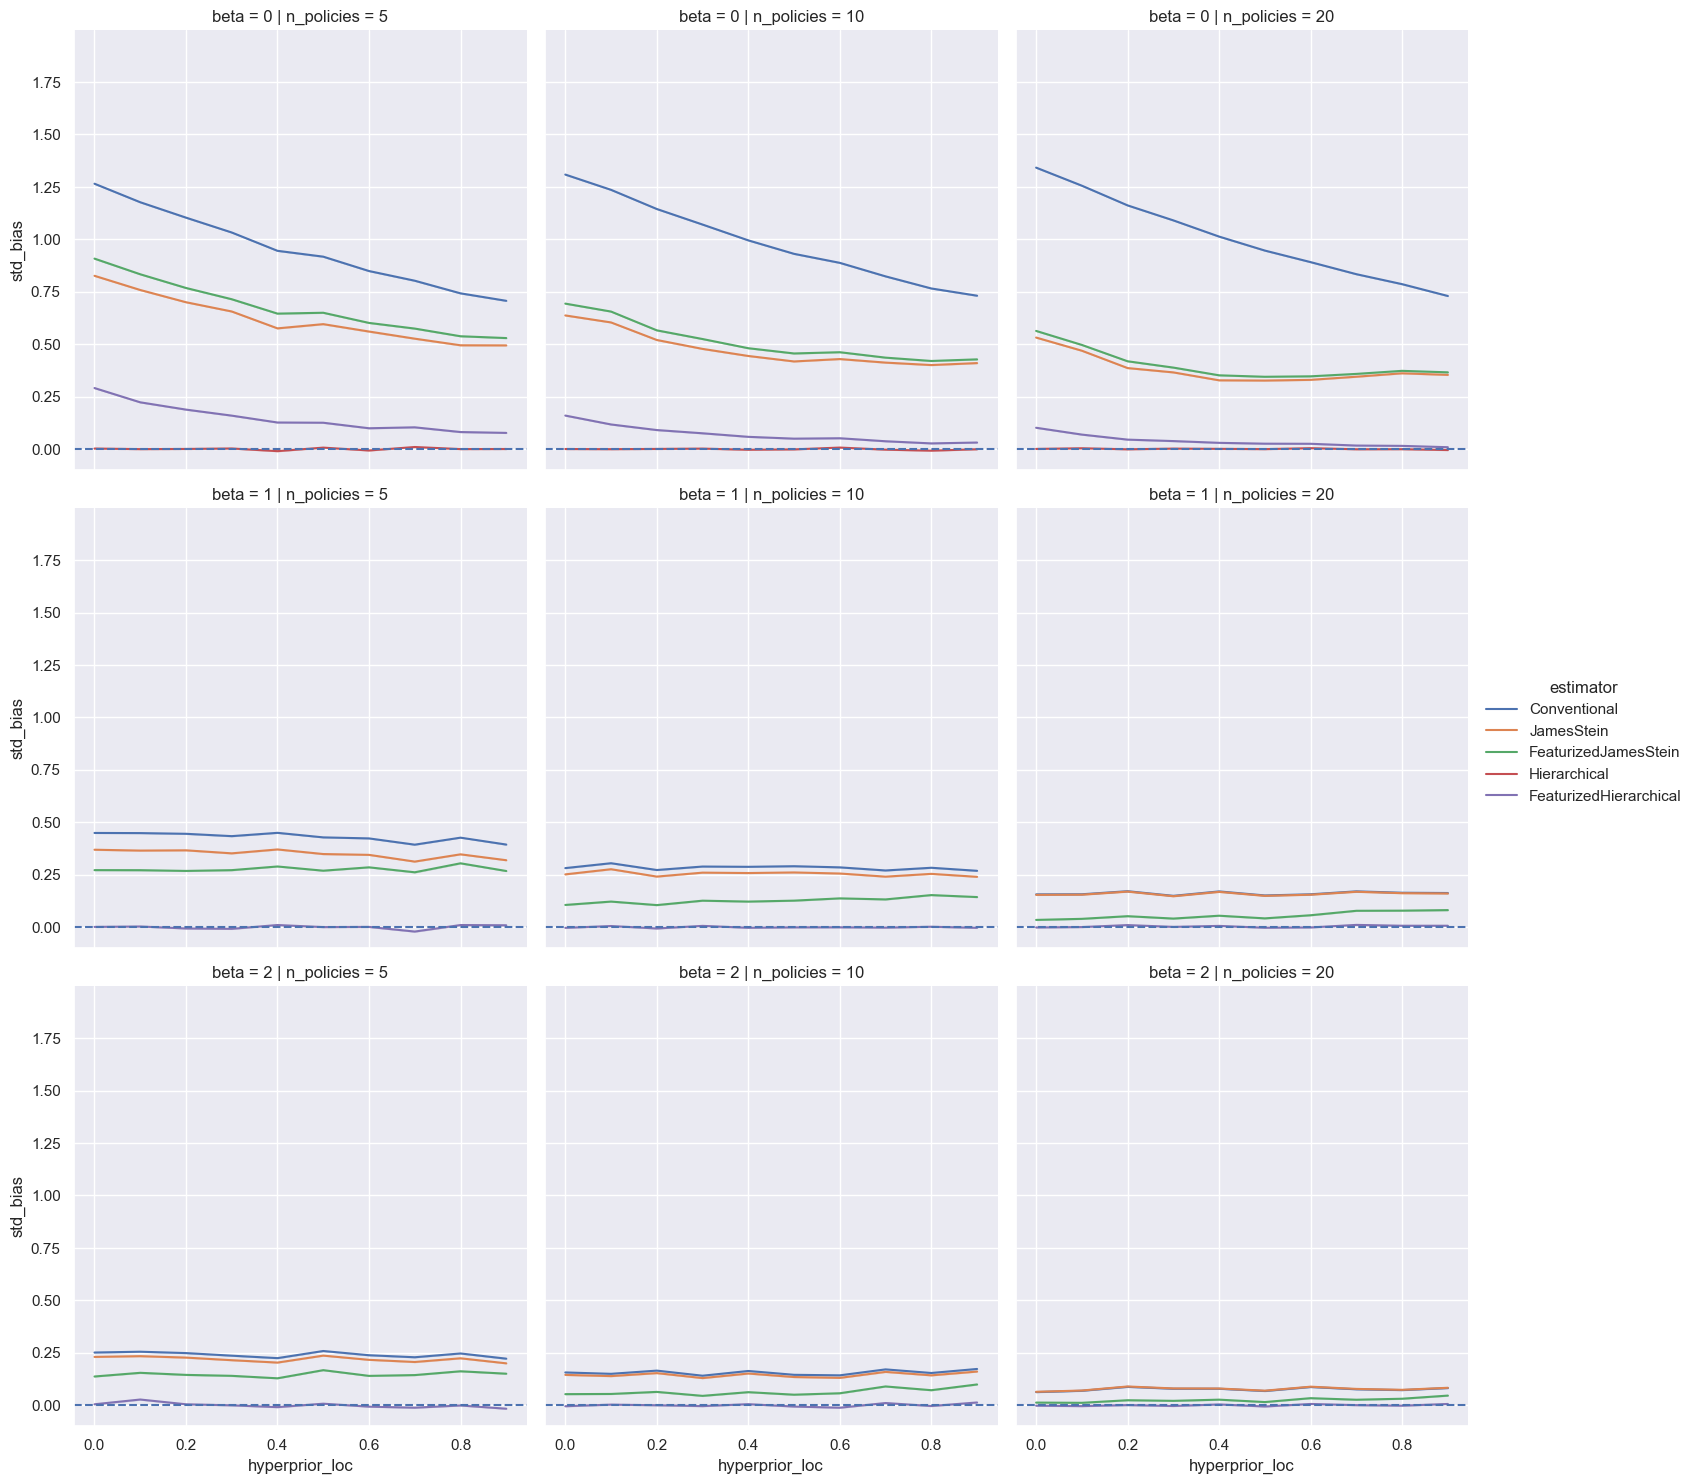

In [16]:
g = relplot("std_bias", mask=df.estimator!="Hybrid")
for axes in g.axes:
    for ax in axes:
        ax.axhline(0, linestyle="--")
g.set(ylim=(-.1, None))
plt.show()

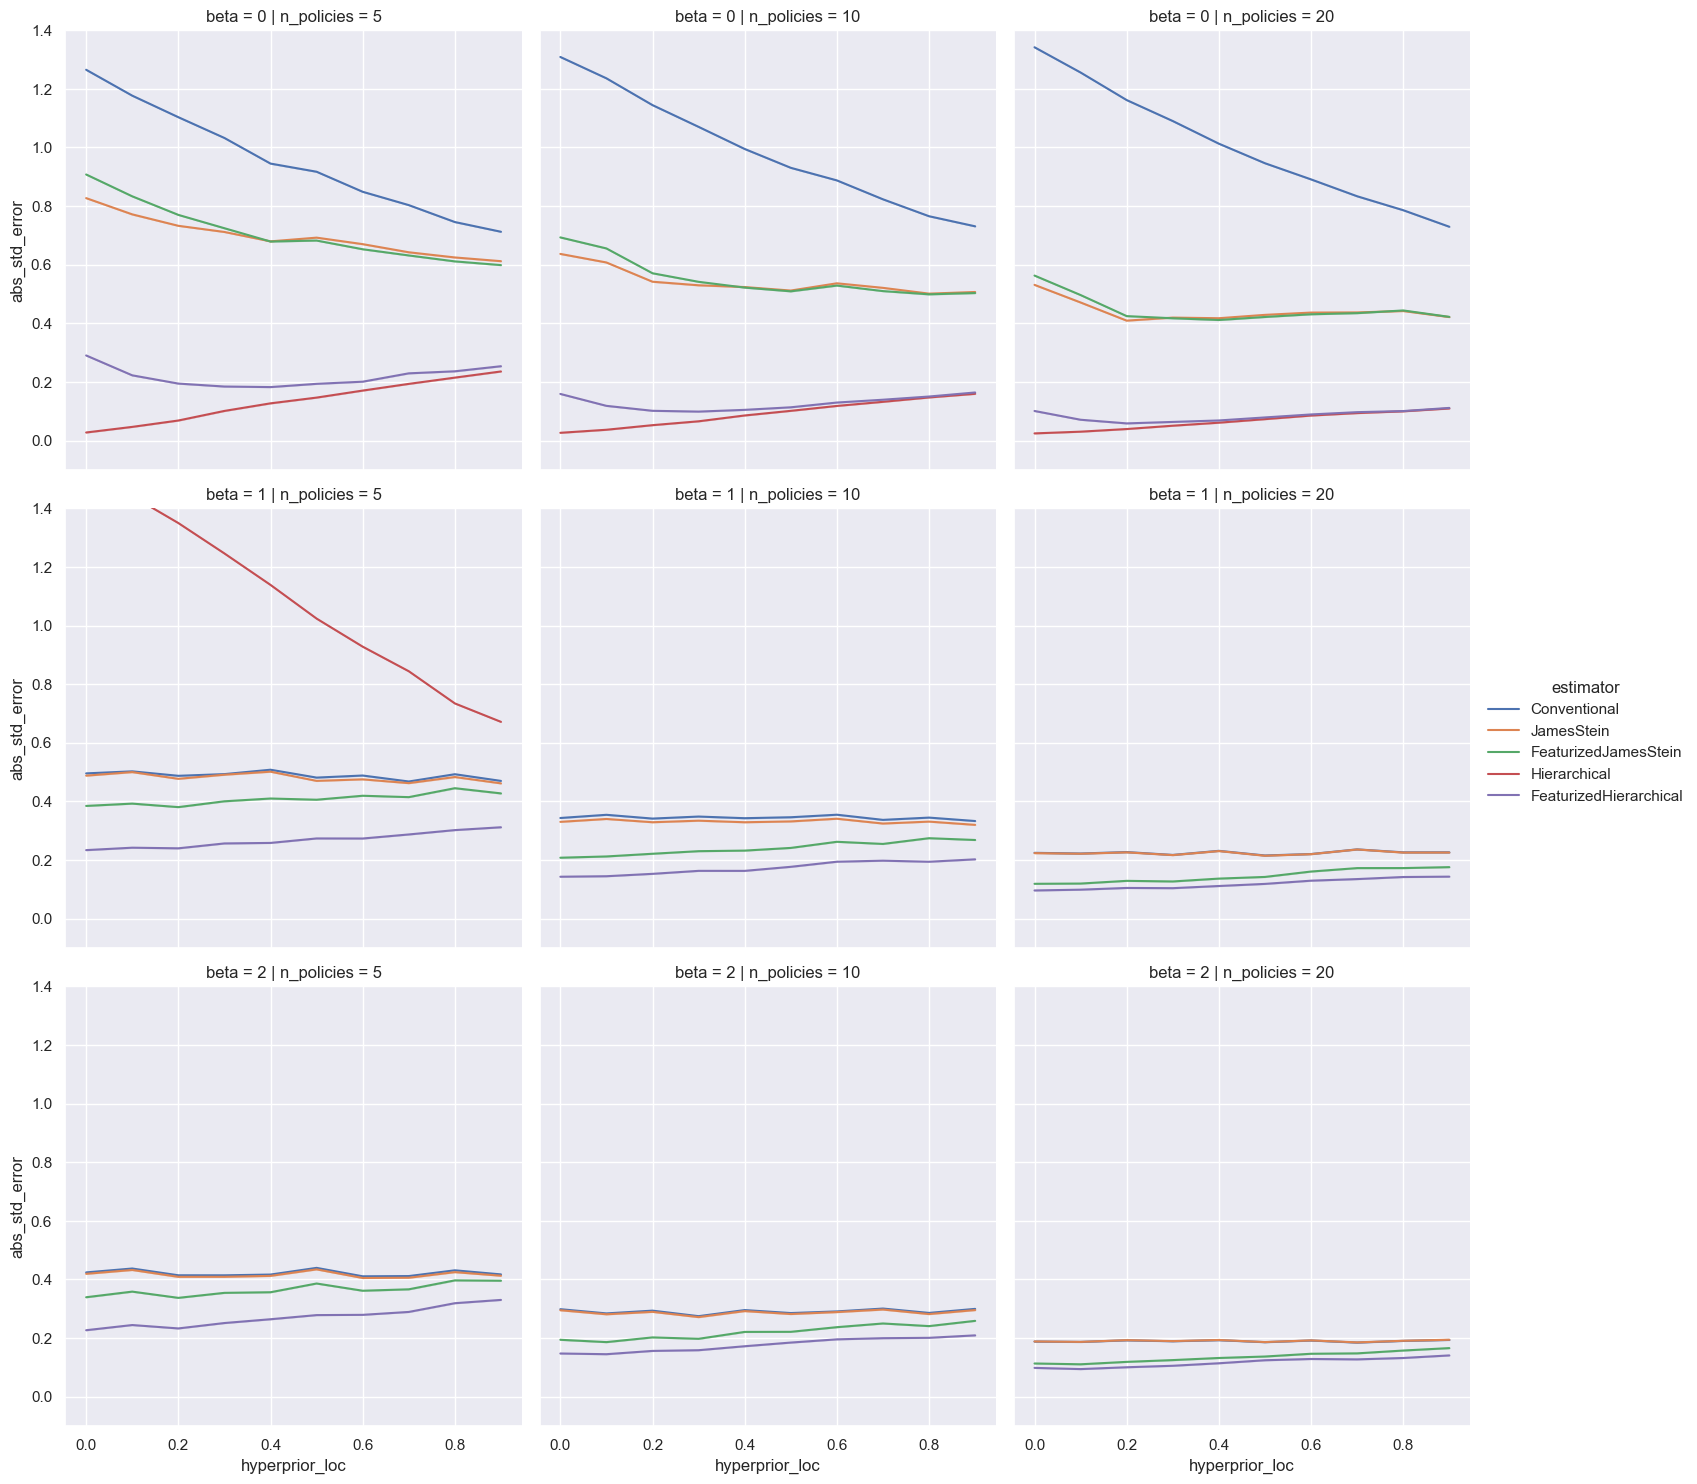

In [17]:
g = relplot("abs_std_error", mask=df.estimator!="Hybrid")
g.set(ylim=(-.1, 1.4))
plt.show()